## Regularisation

This week we will train our first Deep Neural Network to accomplish a **regression** task.
Although classification is the most common area in which Deep Learning is working these days, I want you guys to have exposure to regression problems too.

The classic standard dataset that we are going to use today is the Boston Housing. It uses a number of input features to predict the prices of properties in the city of Boston (US) in the 1970s.

Nothing changes in a neural network being used for regression compared to those used for classification, apart from the output layer. For the regression case, we should not use any function that transforms the output in a probability. Instead, we should just apply a Linear activation function (check your slides) to get a final value (instead of a probability).

In [1]:
from keras.datasets import boston_housing

from keras import models, layers

import matplotlib.pyplot as plt 

In [2]:
(train_X, train_y), (test_X, test_y) = boston_housing.load_data()


'''
Again, if this last line of code doesn't work, run this:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

'''

"\nAgain, if this last line of code doesn't work, run this:\n\nimport ssl\nssl._create_default_https_context = ssl._create_unverified_context\n\n"

In [3]:
train_X.shape

(404, 13)

In [4]:
print('We have', train_X.shape[0],'training samples with',train_X.shape[1],'input features each.')

We have 404 training samples with 13 input features each.


In [5]:
print('We have', test_X.shape[0],'testing samples with',test_X.shape[1],'input features each.')

We have 102 testing samples with 13 input features each.


In [6]:
# The target feature are the property prices, in thousands of dollars
train_y[:20]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5])

## Normalising the data

This week I want to show you how to normalise our data very simply using Numpy. 

A typical _normalisation_ that we haven't done in this program yet is to transform our data into a normal distribution, with average 0 and with a standard deviation of 1.

In Numpy this is 4 lines:

In [7]:
mean = train_X.mean(axis=0) # We calculate the average of all columns. One line
train_X -= mean             # Now we subtract the mean from each column to all of the values in it
std = train_X.std(axis=0)   # Here we calculate the std of all of the columns
train_X /= std              # And finally we divide all of the values in each column by their corresponding std

test_X -= mean
test_X /= std

When doing this normalisation, and as always, **never use test data**. Even to calculate the mean or the standard deviation, use only the training data.

In [8]:
model = models.Sequential() # Our feedforward neural network
model.add(layers.Input(shape=(train_X.shape[1],))) # We could have directly put 13, but anyway... This is more generic
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear')) # Output layer: LINEAR (not sigmoid or softmax or other probabilities!)

# In regression, out loss function and metrics change! 
# Remember from previous courses, we do not have accuracy or recall, etc. In regression. We do have MAE though
# And for the loss function we need something that is not categorical-based, MSE is good enough.
# What we have here is almost the same as the LMS algorithm from Week 2
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [9]:
# In case you want to experiment and add epochs or apply some Early Stopping
NUM_EPOCHS = 600

# Here I introduce another way of doing a validation set, as a percentage of the training (in this case 20%):
model_history = model.fit(train_X, train_y, epochs=NUM_EPOCHS, validation_split=0.2, verbose=0)

# And yes, those are 600 epochs! :D

The training loss and validation loss are almost the same. And the same for the MAE!  

In [10]:
# Change this for plotting whatever area you want of the epochs history:
START_PLOT_FROM_EPOCH = 50

# Preparing some data for the plot:
model_history = model_history.history
train_mae = model_history['mae'][START_PLOT_FROM_EPOCH:]
val_mae = model_history['val_mae'][START_PLOT_FROM_EPOCH:]
epochs = range(1, len(train_mae)+1)

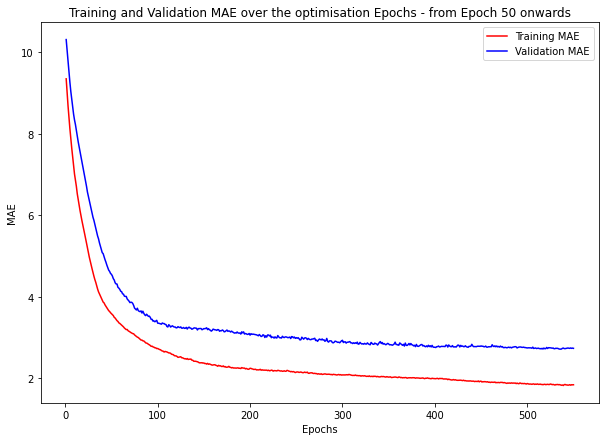

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title(f'Training and Validation MAE over the optimisation Epochs - from Epoch {START_PLOT_FROM_EPOCH} onwards')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

We can see that the validation performance is getting worse over time. We could do an **Early Stopping** as we did in previous interactive activities.
However this week we will try a different form of normalisation: **L2 norm**

We will apply this regularisation to the weight parameters **W** by passing the parameter `kernel_regularizer`.
There are also `bias_regularizer` and `activity_regularizer`. However the most common is the kernel one.

All of the regularizers have a constant parameter, and that is the alpha scaling parameter we saw in the slides.

In [12]:
from tensorflow.keras import regularizers

model_regL2 = models.Sequential()
model_regL2.add(layers.Input(shape=(train_X.shape[1],)))
# Now our hidden layers have L2 regularisation in them. Let's see what happens:
model_regL2.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_regL2.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_regL2.add(layers.Dense(1, activation='linear'))

model_regL2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [13]:
# This takes a little bit to run...
model_regL2_history = model_regL2.fit(train_X, train_y, epochs=NUM_EPOCHS, validation_split=0.2, verbose=0)

In [14]:
model_regL2_history = model_regL2_history.history
train_mae_regL2 = model_regL2_history['mae'][START_PLOT_FROM_EPOCH:]
val_mae_regL2 = model_regL2_history['val_mae'][START_PLOT_FROM_EPOCH:]

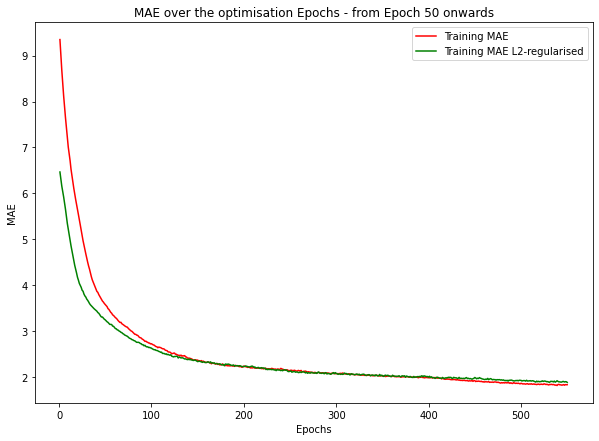

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, train_mae_regL2, 'g', label='Training MAE L2-regularised')
plt.title(f'MAE over the optimisation Epochs - from Epoch {START_PLOT_FROM_EPOCH} onwards')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

We can see that there is not much difference in terms of the training accuracies of the standard and the L2-regularised models...

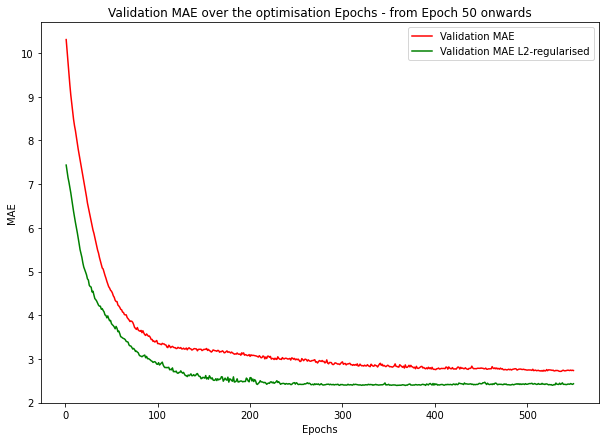

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.plot(epochs, val_mae_regL2, 'g', label='Validation MAE L2-regularised')
plt.title(f'Validation MAE over the optimisation Epochs - from Epoch {START_PLOT_FROM_EPOCH} onwards')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

However, while the non-regularised model is starting be more and more overfit and getting worse validation MAE (at least **most of the times I run it**), the regularised one keeps a more or less constant validation MAE (always).

Let's try another form of Regularisation that we saw in the session: **Dropout**. In Keras, Dropout is performed by layer, so we can specify a Dropout layer before the layer that we want to split. Also, we can specify what percentage of the layer's neurons the Dropout method will be applied to.

In this configuration we will apply Dropout to 1% of the Input neurons and to 1% of all of the Hidden neurons in both hidden layers. What does 1% mean? It means that there is a 1% chance that one of the inputs to that layer will be set to 0. If that happens, a different model will be trained (a sub-network). This will lead to slightly different results, and the optimisation process will be forced to work on the rest of the weights to reduce the overall loss function.

We specify a random seed so we always select the same _random_ neurons.

In [17]:
from keras import constraints, optimizers

SEED = 1000

model_regDropout = models.Sequential()
model_regDropout.add(layers.Dropout(0.01, input_shape=(train_X.shape[1],), seed=SEED))
model_regDropout.add(layers.Dense(8, activation='relu'))
model_regDropout.add(layers.Dropout(0.01, seed=SEED))
model_regDropout.add(layers.Dense(8, activation='relu'))
model_regDropout.add(layers.Dropout(0.01, seed=SEED))
model_regDropout.add(layers.Dense(1, activation='linear'))

model_regDropout.compile(optimizer='rmsprop', loss='mse' , metrics=['mae'])

In [18]:
model_regDropout_history = model_regDropout.fit(train_X, train_y, epochs=NUM_EPOCHS, validation_split=0.2, verbose=0)

In [19]:
model_regDropout_history = model_regDropout_history.history
train_mae_regDropout = model_regDropout_history['mae'][START_PLOT_FROM_EPOCH:]
val_mae_regDropout = model_regDropout_history['val_mae'][START_PLOT_FROM_EPOCH:]

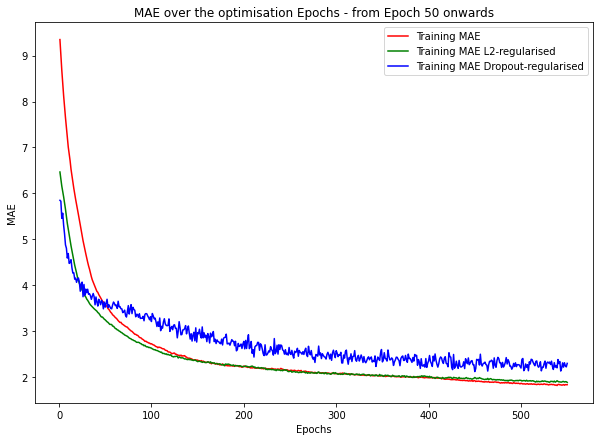

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, train_mae_regL2, 'g', label='Training MAE L2-regularised')
plt.plot(epochs, train_mae_regDropout, 'b', label='Training MAE Dropout-regularised')
plt.title(f'MAE over the optimisation Epochs - from Epoch {START_PLOT_FROM_EPOCH} onwards')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

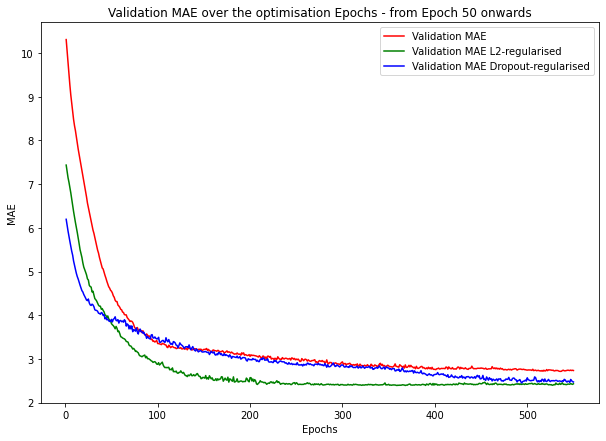

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.plot(epochs, val_mae_regL2, 'g', label='Validation MAE L2-regularised')
plt.plot(epochs, val_mae_regDropout, 'b', label='Validation MAE Dropout-regularised')
plt.title(f'Validation MAE over the optimisation Epochs - from Epoch {START_PLOT_FROM_EPOCH} onwards')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Learning Practice:

As always, play with the Deep Learning models: add/remove layers and neurons and see if you can achieve the simplest model without compromising performance.

This week in particular you can also look at different **norm penalty regularisers**. In this bit of code: `kernel_regularizer=regularizers.l2(0.01)` you can change `regularizers.l2` for `regularizers.l1` or `regularizers.l1_l2` to try out the L1 and the Elastic Net regularisers. What results do you obtain? Are they better than L2?

Also, you can change the % in the `Dropout` layers. Make them bigger or even smaller, and see how that affects the performance.

Finally, you can use any of the neural nets' `predict` method to see the numeric output and compare it with the real target feature.